# MNIST using Keras

https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np

In [2]:
np.random.seed(123)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils

Using TensorFlow backend.


# MNIST 데이터 불러오기

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


/Users/andymac/dev/tf_python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


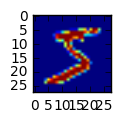

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (1,1)
plt.imshow(X_train[0])

# 전처리 - (1) 입력 이미지

### RGB 채널 넣어 준다 (mnist의 경우에는 1)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
print X_train.shape
print X_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### float32로 변환해 준다

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### [0,1] 범위로 normalize해 준다

In [11]:
X_train /= 255
X_test /= 255

# 전처리 - (2) 출력 클래스 레이블

### One-hot encoding 해 준다

In [12]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
print Y_train.shape
print Y_test.shape

(60000, 10)
(10000, 10)


# 모델 만들어주기

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
print model.output_shape # 현재 모델의 (예상되는) 결과물을 찍어볼 수 있다

(None, 26, 26, 32)


In [16]:
model.add(Conv2D(32, (3,3), activation='relu'))
print model.output_shape

(None, 24, 24, 32)


In [17]:
model.add(MaxPool2D(pool_size=(2,2)))
print model.output_shape

(None, 12, 12, 32)


In [18]:
model.add(Dropout(0.25))
print model.output_shape

(None, 12, 12, 32)


In [19]:
model.add(Flatten())
print model.output_shape

(None, 4608)


In [20]:
model.add(Dense(128, activation='relu'))
print model.output_shape

(None, 128)


In [21]:
model.add(Dropout(0.5))
print model.output_shape

(None, 128)


In [22]:
model.add(Dense(10, activation='softmax'))
print model.output_shape

(None, 10)


# 컴파일하기
* 만든 모델을 세워주는 (?) 과정
* 사용할 loss fn과 optimizer를 지정해 준다.

### 연습 - metrics를 별도로 지정해주지 않으면 디폴트로 loss만 metrics가 된다. 

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              )

In [31]:
model.metrics_names

['loss']

### 일반적으로 metrics에는 accuracy를 지정해 준다.
그러면 나중에 model.evaluate()할 때 loss와 accuracy 2개를 리턴받을 수 있다. 

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.metrics_names

['loss', 'acc']

# Fitting 하기
* 모델을 트레이닝 데이터에게 맞추어 나가는 과정
* batch size, epoch 등을 지정해 준다.

In [25]:
model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 144s - loss: 0.0822 - acc: 0.9756     

# 평가하기

In [26]:
score = model.evaluate(X_test, Y_test, verbose=1)

 9984/10000 [============================>.] - ETA: 0s 

In [28]:
model.metrics_names

['loss', 'acc']

### model.evaluate() 가 리턴하는 것 - model.compile() 시에 지정한 metrics와 연관되게 된다
* model.compile() 시에 metrics를 주지 않은 경우 : 단순히 loss만 리턴한다. 
* model.compile() 시에 metrics를 accuracy로 준 경우 : loss와 acc를 리턴한다.

참고로 metrics 에 accuracy 외에 다른 것들을 포함시키는 것도 활발하게 논의되어 왔으나 결론적으로 2.0 버전에는 빠져있다.

https://github.com/fchollet/keras/issues/2607

In [27]:
print "Accuracy : ", score

Accuracy :  [0.035491529448330401, 0.98819999999999997]
